# Clean Up our Intake Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Utility for displaying our DataFrames
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
from datetime import date, datetime

def calculate_age(born):
    today = date.today()
    if born in ['---', '']:
        return ''
    born = datetime.strptime(born, '%Y-%m-%d')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

np_age = np.vectorize(calculate_age)

In [4]:
def concat(col1, col2, debug=False):
    prohibited = ['', '---', 'nan']
    if col1 not in prohibited:
        return col1
    elif col2 not in prohibited:
        return col2
    else:
        return ''

np_concat = np.vectorize(concat)

In [5]:
def age_concat(col1, col2):
    prohibited = ['', '---', 'nan']
    col1 = 0 if col1 in prohibited else float(col1)
    col2 = 0 if col2 in prohibited else float(col2)
    col1 = 0 if np.isnan(col1) else col1
    col2 = 0 if np.isnan(col2) else col2
    return col1 if col1 != 0 else col2

np_age_concat = np.vectorize(age_concat)

In [6]:
def lat(col):
    try:
        return float(col.split(' ')[0])
    except:
        return 0
get_lat = np.vectorize(lat)

def lng(col):
    try:
        return float(col.split(' ')[1])
    except:
        return 0
get_lng = np.vectorize(lng)

### First let us read in our unclean export data

In [7]:
unclean = pd.read_csv('../match-data/uncleaned-intakes.csv')
unclean.replace(['---'], '')

,number,formid,form.int.nationality,form.dem.gender,form.dem.dob,form.dem.age,form.int.nationality_calc,form.cd.uuid,form.dem.age_calc,form.cd.fname,...,form.ed.edu1,form.cj.is_manual_labor,form.cj.is_admin_job,form.cj.is_professional_job,form.cj.is_management_job,form.cj.workspace_preference,form.we.prev_job_location,form.id.gps,form.cd.first_name,form.cd.last_name
0,0,uuid:232d8d82-0c11-4aa2-8a76-b4a244f60ca6,,,,48.0,,,,امل,...,3,,,,,,,32.56341362 35.82743754 527.0 13.65,,
1,1,uuid:032b493f-e90e-42d8-ba55-66da02b70ec4,,,,NaN,,,,محمد,...,3,,,,,,,32.56381511 35.82414651 538.0 106.18,,
2,2,uuid:04b3cb22-7f12-4d7b-ad89-25f65b0dcdbe,,,,44.0,,,,محمد,...,2,,,,,,,32.57277106 35.80145862 587.0 25.78,,
3,3,uuid:326c85f5-ed1d-40fa-a370-17b43c2b0ea9,,,,28.0,,,,رنا,...,3,,,,,,,32.57245561 35.80178963 512.0 13.65,,
4,4,uuid:bdc35371-ba9d-4d1d-a678-3a1744c32297,,,,40.0,,,,عفاف,...,5,,,,,,,32.53877962 35.84859773 637.0 16.68,,
5,5,uuid:74f432df-c4b6-4af3-94c2-48cdb0a68fa4,,,,NaN,,,,مريم,...,2,,,,,,,32.55391673 35.80441486 569.0 25.78,,
6,6,uuid:644eb4c7-b08b-4511-ab94-f3a949fb3e2a,,,,53.0,,,,عزيزة حسين,...,1,,,,,,,NaN,,
7,7,uuid:129638e4-bce9-41b7-a933-779a595fc428,,,,20.0,,,,ولاء,...,3,,,,,,,32.5053713 35.8638544 0.0 20.0,,
8,8,uuid:c185457a-a199-4784-93db-d501d7282229,,,,19.0,,,,ايات,...,3,,,,,,,32.53869682 35.84859372 627.0 4.55,,
9,9,uuid:d4f974d1-a152-413f-ba0f-d90817fd1429,,,,25.0,,,,هيام,...,6,,,,,,,32.5065657 35.8884198 0.0 20.0,,


### Now we will merge, reformat columns and create a new "clean" data frame

In [8]:
clean = pd.DataFrame()

# Clean Nationality
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['1'], 'jordanian')
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['2'], 'syrian')
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['---'], '')

unclean['form.int.nationality'] = unclean['form.int.nationality'].replace(['---'], '')
unclean['nationalty'] = unclean['form.int.nationality'].map(str) + unclean['form.int.nation']
clean['nationality'] = unclean['nationalty'].replace([''], 'unknown')

# Clean Gender
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['0'], 'female')
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['1'], 'male')
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['---'], '')
unclean['form.dem.gender'] = unclean['form.dem.gender'].replace(['---'], '')
clean['gender'] = unclean['form.dem.gender'].map(str) + unclean['form.dem.male']

# Clean Education Level
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['1'], 'none')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['2'], 'primary')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['3'], 'secondary')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['4'], 'college')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['5'], 'diploma')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['6'], 'bachelors')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['7'], 'masters')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['7'], 'doctorate')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['---'], '')
unclean['form.ed.highest_edu_level'] = unclean['form.ed.highest_edu_level'].replace(['---'], '')
unclean['edu'] = unclean['form.ed.edu1'].map(str) + unclean['form.ed.highest_edu_level']
clean['education'] = unclean['edu'].replace([''], 'unknown')

# Clean Age
unclean['form.dem.age'] = unclean['form.dem.age'].replace(['---'], '')
unclean['form.dem.age_calc'] = unclean['form.dem.age_calc'].replace(['---'], '')
unclean['dob_age'] = np_age(unclean['form.dem.dob'])


unclean['age_concat'] = np_age_concat(unclean['form.dem.age'], unclean['form.dem.age_calc'])
clean['age'] = np_age_concat(unclean['age_concat'], unclean['dob_age'])

# Clean Night Shfit
unclean['form.jp.night'] = unclean['form.jp.night'].replace(['---'], '')
unclean['form.jp.will_work_night_shift'] = unclean['form.jp.will_work_night_shift'].replace(['---'], '')
clean['night-shift'] = np_concat(unclean['form.jp.night'], unclean['form.jp.will_work_night_shift'])

clean['lat'] = get_lat(unclean['form.id.gps'])
clean['lng'] = get_lng(unclean['form.id.gps'])

unclean['form.cd.first_name'] = unclean['form.cd.first_name'].replace(['---'], '')
unclean['form.cd.fname'] = unclean['form.cd.fname'].replace(['---'], '')
unclean['form.cd.last_name'] = unclean['form.cd.last_name'].replace(['---'], '')
unclean['form.cd.lname'] = unclean['form.cd.lname'].replace(['---'], '')

clean['first-name'] = np_concat(unclean['form.cd.first_name'], unclean['form.cd.fname'])
clean['last-name'] = np_concat(unclean['form.cd.last_name'], unclean['form.cd.lname'])

clean

,nationality,gender,education,age,night-shift,lat,lng,first_name,last_name
0,syrian,female,secondary,48.0,0,32.563414,35.827438,امل,حامد قناطرة
1,syrian,male,secondary,0.0,1,32.563815,35.824147,محمد,قناطره
2,syrian,male,primary,44.0,1,32.572771,35.801459,محمد,ابو شناق
3,syrian,female,secondary,28.0,0,32.572456,35.801790,رنا,اللبني
4,syrian,female,diploma,40.0,0,32.538780,35.848598,عفاف,العواد
5,syrian,female,primary,0.0,0,32.553917,35.804415,مريم,الجهماني
6,syrian,female,none,53.0,0,0.000000,0.000000,عزيزة حسين,ابو حصيني
7,syrian,female,secondary,20.0,0,32.505371,35.863854,ولاء,العاسمي
8,syrian,female,secondary,19.0,0,32.538697,35.848594,ايات,طحينه
9,syrian,female,bachelors,25.0,0,32.506566,35.888420,هيام,القداح


#### Just some simple heuristics 

[]

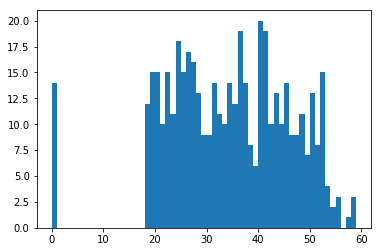

In [9]:
clean_age = clean['age'].replace([np.nan], -1).map(int)
plt.hist(clean_age, bins=range(min(clean_age), max(clean_age)))
plt.plot()

### Lastly, lets save our cleaned data out as a csv

In [10]:
clean.to_csv('../match-data/clean_all.csv')